In [1]:
import pathlib
import sys
sys.path.insert(0, str(pathlib.Path("../..").absolute()))
from IPython.display import display, clear_output, Image
from matplotlib import pyplot as plt
from typing import List, Tuple
import numpy as np
import torch
from ipywidgets import widgets
from torch.utils.tensorboard import SummaryWriter
import gymnasium as gym
import tqdm
from system_config import SystemConfig
IMG_DIR = pathlib.Path("img")
IMG_DIR.mkdir(exist_ok=True)
MODEL_DIR = pathlib.Path("models")
MODEL_DIR.mkdir(exist_ok=True)
LOG_DIR = pathlib.Path("logs")
LOG_DIR.mkdir(exist_ok=True)
DELTA_T = 10
DRAW_SIZE = (1000, 400)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

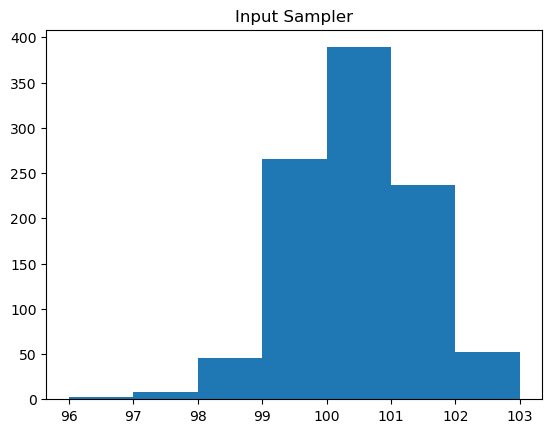

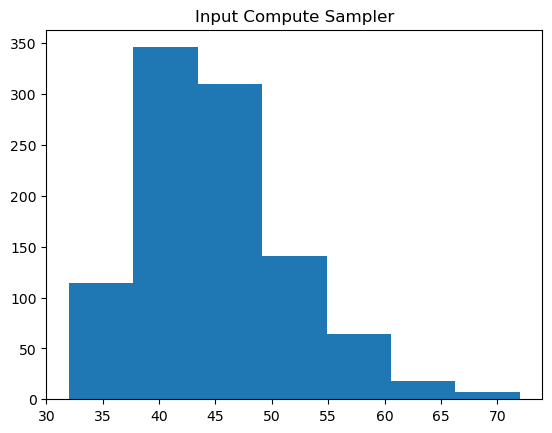

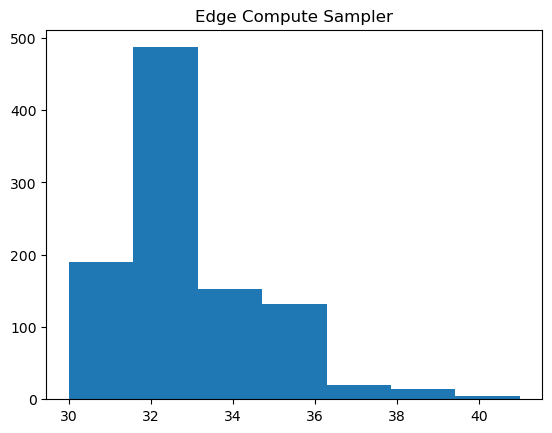

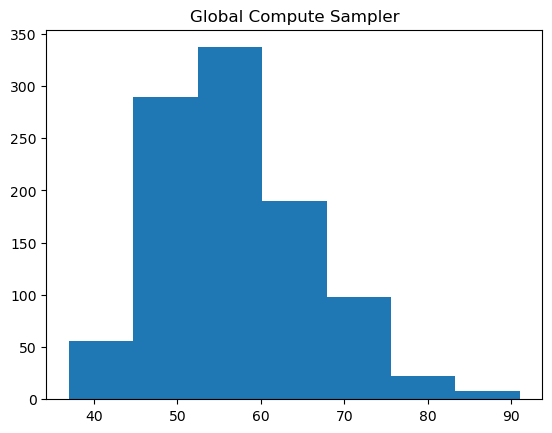

In [2]:
def sys_cfg() -> SystemConfig:
    return SystemConfig(dt=DELTA_T)

def make_env():
    cfg = sys_cfg()
    return gym.make("HierarchicalSystem-v0", **cfg.make(), render_mode="jupyter", window_size = DRAW_SIZE).unwrapped

def plot_sampler(sampler, n: int = 1000) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(1, 1)
    sampler.reset(0)
    samples = [sampler.sample() for i in range(n)]
    ax.hist(samples, bins = 7)
    return fig, ax
    
def plot_sampling_distributions(cfg: SystemConfig):
    fig, ax = plot_sampler(cfg.input_sampler)
    ax.set_title('Input Sampler')
    fig, ax = plot_sampler(cfg.input_compute_sampler)
    ax.set_title('Input Compute Sampler')
    fig, ax = plot_sampler(cfg.edge_compute_sampler)
    ax.set_title('Edge Compute Sampler')
    fig, ax = plot_sampler(cfg.global_compute_sampler)
    ax.set_title('Global Compute Sampler')

plot_sampling_distributions(sys_cfg())

In [3]:
class Interact:
    def __init__(self, env):
        self.env = env
        self.state, _ = env.reset()
        self.label = widgets.HTML(
            value="<b>Action Inputs</b> (Check to enable)",
        )
        self.check_boxes = [widgets.Checkbox(value=False, description=action.name, indent = 0) for action in self.env.system.actions]
        self.button = widgets.Button(description = 'Run Timestep')   
        self.button.on_click(self.update)
        self.output = widgets.Output()
        
        display(self.label, *self.check_boxes, self.button, self.output)
        with self.output:
            display(self.env.render())
            clear_output(True)

    def update(self, arg):
        actions = [0 for _ in range(8)]
        num_actions = len(self.check_boxes)
        actions[-num_actions:] = [box.get_interact_value() for box in self.check_boxes]
        action = np.packbits(actions, bitorder='big')
        self.state, reward, _, _, info= self.env.step(action)
        
        with self.output:
            print(f"Action: {action}, Reward: {reward}")
            print(f"Info: {info}")
            print(f"State: {self.state}")
            display(self.env.render())
            clear_output(True)
            
def make_interactive_plot():
    env = make_env()
    interact = Interact(env)
    #ImageCreator.save(interact.drawer, IMG_DIR / "system.jpg")

make_interactive_plot()



HTML(value='<b>Action Inputs</b> (Check to enable)')

Checkbox(value=False, description='EDGE_CMP_0_ACT', indent=False)

Checkbox(value=False, description='EDGE_CMP_1_ACT', indent=False)

Checkbox(value=False, description='OUTPUT_CMP_ACT', indent=False)

Button(description='Run Timestep', style=ButtonStyle())

Output()

In [5]:
env = make_env()
env.render_mode = "rgb_array"
env.reset(0)

from gymnasium.wrappers import RecordVideo
env = RecordVideo(env, video_folder="videos", name_prefix="eval",
                  episode_trigger=lambda x: True)


env.reset()
for i in range(1000):
    env.step(7)
env.close()

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


/home/davidmauderli/.conda/envs/scheduling-env/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning:

WARN: Overwriting existing videos at /home/davidmauderli/repos/scheduling/code/notebooks/02_three_stage_system/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



Moviepy - Building video /home/davidmauderli/repos/scheduling/code/notebooks/02_three_stage_system/videos/eval-episode-0.mp4.
Moviepy - Writing video /home/davidmauderli/repos/scheduling/code/notebooks/02_three_stage_system/videos/eval-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/davidmauderli/repos/scheduling/code/notebooks/02_three_stage_system/videos/eval-episode-0.mp4
